## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.regularizers import l1
from keras.layers import Dropout
def build_mlp(input_shape , output_units = 10 , num_neurons = [512,256,128], drp_ratio=0.2, l1_ratio=0.01):
    input_layer = keras.layers.Input(input_shape)
    
    for i , n_units in enumerate(num_neurons):
        
        if i == 0:
            
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                  name = "hidden_layer"+str(i+1),
                                  kernel_regularizer=l1(l1_ratio))(input_layer)
                                   
            x = Dropout(rate = drp_ratio)(x)
       
        else :
            x = keras.layers.Dense(units=n_units, activation="relu" ,name ="hidden_layer"+str(i+1),
                                  kernel_regularizer=l1(l1_ratio))(x)
            
            x = Dropout(rate = drp_ratio)(x)

            
            
    out = keras.layers.Dense(units=output_units, activation="softmax",name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs = [out])
        
    """Code Here
    建立你的神經網路
    """
    return model

In [7]:
"""Code Here
設定超參數
"""
EPOCHS = 20
BATCH_SIZE = 250
MOMENTUM = 0.95
LEARNING_RATE = [1e-1,1e-2,1e-3,1e-4]


In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer =keras.optimizers.SGD(lr=lr,momentum=MOMENTUM,nesterov=True)
    model.compile(loss = "categorical_crossentropy", metrics=['accuracy'],optimizer = optimizer)
    
    model.fit(x_train,y_train,
             epochs = EPOCHS,
             batch_size = BATCH_SIZE,
             validation_data = (x_test,y_test),
             shuffle = True)


    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc  = model.history.history["acc"]
    valid_acc  = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {"train_loss":train_loss,
                             "valid_loss":valid_loss,
                             "train_acc" :train_acc,
                             "valid_acc" :valid_acc}


Experiment with LR = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________

50000/50000 [==============================] - 3s 62us/step - loss: 3.9056 - acc: 0.0971 - val_loss: 3.9020 - val_acc: 0.1000
Epoch 13/20
50000/50000 [==============================] - 3s 63us/step - loss: 3.9055 - acc: 0.0999 - val_loss: 3.8978 - val_acc: 0.1000
Epoch 14/20
50000/50000 [==============================] - 3s 63us/step - loss: 3.9056 - acc: 0.0992 - val_loss: 3.8979 - val_acc: 0.1000
Epoch 15/20
50000/50000 [==============================] - 3s 61us/step - loss: 3.9054 - acc: 0.0983 - val_loss: 3.8999 - val_acc: 0.1000
Epoch 16/20
50000/50000 [==============================] - 3s 63us/step - loss: 3.9055 - acc: 0.0987 - val_loss: 3.8994 - val_acc: 0.1000
Epoch 17/20
50000/50000 [==============================] - 3s 62us/step - loss: 3.9055 - acc: 0.0977 - val_loss: 3.8988 - val_acc: 0.1000
Epoch 18/20
50000/50000 [==============================] - 3s 61us/step - loss: 3.9055 - acc: 0.0985 - val_loss: 3.9003 - val_acc: 0.1000
Epoch 19/20
50000/50000 [=====================

Epoch 10/20
50000/50000 [==============================] - 3s 62us/step - loss: 34.0167 - acc: 0.1865 - val_loss: 30.0577 - val_acc: 0.1591
Epoch 11/20
50000/50000 [==============================] - 3s 59us/step - loss: 27.8592 - acc: 0.1157 - val_loss: 25.9600 - val_acc: 0.1000
Epoch 12/20
50000/50000 [==============================] - 3s 59us/step - loss: 24.2529 - acc: 0.1000 - val_loss: 22.5776 - val_acc: 0.1000
Epoch 13/20
50000/50000 [==============================] - 3s 59us/step - loss: 21.0130 - acc: 0.1000 - val_loss: 19.4801 - val_acc: 0.1000
Epoch 14/20
50000/50000 [==============================] - 3s 60us/step - loss: 18.0559 - acc: 0.1000 - val_loss: 16.6638 - val_acc: 0.1000
Epoch 15/20
50000/50000 [==============================] - 3s 60us/step - loss: 15.3766 - acc: 0.1000 - val_loss: 14.1228 - val_acc: 0.1000
Epoch 16/20
50000/50000 [==============================] - 3s 59us/step - loss: 12.9736 - acc: 0.1001 - val_loss: 11.8591 - val_acc: 0.1000
Epoch 17/20
50000/50

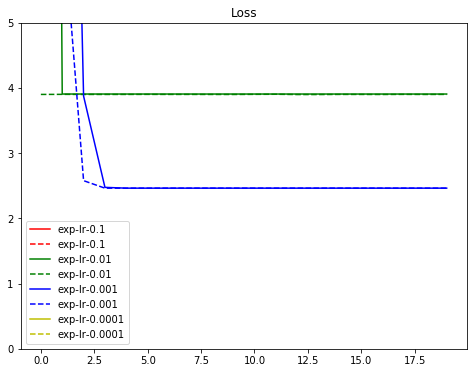

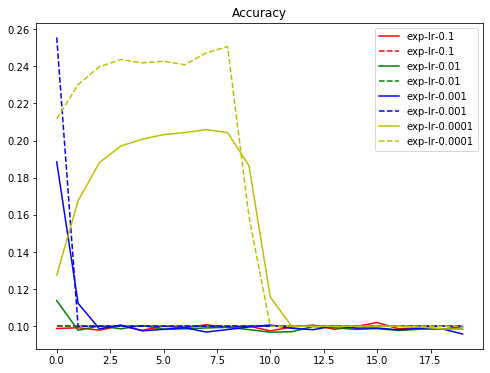

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()